<a href="https://colab.research.google.com/github/AJamal27891/Data_mining_course/blob/main/Demo_DataMining_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustring and Frequency patterns finding** Dataset II


In [ ]:
import pandas as pd
data_2 = pd.read_csv(r'/content/drive/MyDrive/DataMining_project2/Sales_Transactions_Dataset_Weekly.csv')
data_2.head(3)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36


In [ ]:
!pip install mlxtend==0.17

In [ ]:
import mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as psfs
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
data_2.index = data_2.Product_Code
data_2.drop(['Product_Code'],axis=1, inplace=True)
products_transactions = data_2.T

In [ ]:
products_transactions.describe()

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,5.133302,2.242453,4.678019,4.435755,4.527358,2.367264,2.304717,4.646321,5.524340,10.137736,6.116792,2.212547,4.846509,6.262736,17.931792,18.621604,17.539057,16.725755,16.774245,4.793019,4.768774,5.015000,2.338302,18.617453,15.944906,5.471887,17.924245,16.859434,6.386981,16.797925,4.570094,4.871509,6.164528,19.179434,17.92717,18.333962,18.462453,18.809151,17.462925,18.507736,...,0.128774,8.608396,2.082453,6.969906,1.912736,1.303774,1.355472,0.799151,1.924434,1.767830,1.413868,3.005377,0.910377,1.730094,0.432075,0.317358,1.889623,1.68783,1.366321,2.686226,0.907547,1.646132,0.485849,2.023302,1.705189,1.541321,2.833208,0.805094,1.769057,0.509434,0.279528,2.012925,0.937075,1.371792,2.817925,0.317358,1.597075,0.344340,0.259434,0.229340
std,5.511027,2.558011,4.646384,4.872336,4.808302,2.724184,2.595872,4.620747,5.687687,10.399781,6.253629,2.299516,5.219911,6.724431,18.234093,18.736421,17.913910,16.915414,16.876620,4.838241,4.784010,5.371358,2.320547,18.844777,16.086869,5.788275,18.204359,16.626862,6.733360,17.039753,4.790640,5.000176,6.189965,19.379182,17.91895,18.844924,18.696968,19.558694,17.896615,18.718416,...,0.465850,8.937984,2.140106,7.506966,2.038676,1.468717,1.438980,1.214159,2.212133,2.267226,1.710393,3.336464,1.148596,2.207844,0.917610,0.612772,2.256332,2.04246,1.505252,2.924000,1.126368,2.197969,0.826517,2.205090,1.796186,1.816534,2.980577,1.228434,2.500062,0.836606,0.605320,2.096133,1.164113,1.766759,3.402147,0.612772,1.914244,0.747578,0.469200,0.591567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390000,0.300000,0.450000,0.350000,0.330000,0.360000,0.300000,0.500000,0.470000,0.430000,0.380000,0.440000,0.470000,0.410000,0.520000,0.417500,0.495000,0.437500,0.410000,0.470000,0.500000,0.470000,0.440000,0.575000,0.450000,0.390000,0.390000,0.500000,0.380000,0.600000,0.500000,0.460000,0.470000,0.470000,0.44000,0.430000,0.387500,0.390000,0.387500,0.527500,...,0.000000,0.330000,0.380000,0.390000,0.325000,0.200000,0.330000,0.035000,0.270000,0.220000,0.250000,0.270000,0.000000,0.220000,0.000000,0.000000,0.300000,0.22000,0

In [ ]:
normalized = products_transactions[54:]

In [ ]:
normalized[normalized >.5] = True
normalized[normalized <=.5] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
normalized

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
Normalized 0,False,True,False,True,False,False,False,False,True,True,True,False,True,False,False,False,True,True,False,True,True,False,False,True,False,True,True,True,False,True,False,True,True,True,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Normalized 1,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Normalized 2,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Normalized 3,False,False,True,False,True,True,True,False,False,True,True,True,False,False,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,False,False,True,True,False,True,True,True,True,True,...,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Normalized 4,True,True,True,False,False,True,True,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,True,False,True,False,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Normalized 5,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
Normalized 6,True,True,False,False,False,True,False,False,True,True,False,True,True,False,True,True,True,False,False,True,True,True,True,True,True,False,True,False,True,True,True,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
Normalized 7,True,False,True,True,True,True,False,False,False,False,True,False,False,False,True,True,True,True,True,False,True,True,False,True,False,False,False,False,True,False,True,True,True,True,False,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False,False,False,False,F

In [ ]:
from mlxtend.frequent_patterns import apriori
apriori(normalized, min_support=0.4)


,support,itemsets
0,0.442308,(2)
1,0.403846,(8)
2,0.442308,(12)
3,0.5,(14)
4,0.480769,(16)
...,...,...
307,0.403846,"(140, 179, 100)"
308,0.403846,"(140, 100, 537)"
309,0.403846,"(179, 100, 141)"
310,0.403846,"(179, 100, 166)"


In [ ]:
aprior_results = apriori(normalized, min_support=0.5, use_colnames=True)
aprior_results['length'] = aprior_results.apply(lambda x: len(x['itemsets']),axis=1 )
supported = aprior_results[aprior_results['length']>1]

In [ ]:
def find_conf(seq,df):
  uni_supp = seq[0]
  x = next(iter(seq[1]))
  x = frozenset([x])
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  return uni_supp/x_supp

def find_left(seq,df):
  uni_supp = seq[0]
  x = next(iter(seq[1]))
  x = frozenset([x])
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  _, y = iter(seq[1])
  y = frozenset([y])
  y_supp = df[df['itemsets'] == y].values[0]
  y_supp = next(iter(y_supp))
  
  return uni_supp/(x_supp * y_supp)

def find_convic(seq,df):
  uni_supp = seq[0]
  x = next(iter(seq[1]))
  x = frozenset([x])
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  _, y = iter(seq[1])
  y = frozenset([y])
  y_supp = df[df['itemsets'] == y].values[0]
  y_supp = next(iter(y_supp))
  confi_x = uni_supp/x_supp

  return (1-y_supp)/(1-confi_x)



In [ ]:
supported['confidence'] = supported.apply(lambda x: find_conf(x,aprior_results),axis=1)
supported['left'] = supported.apply(lambda x: find_left(x,aprior_results),axis=1)
supported['conviction'] = supported.apply(lambda x: find_convic(x,aprior_results),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
supported

,support,itemsets,length,confidence,left,conviction
53,0.519231,"(P180, P101)",2,0.818182,1.289256,2.009615
54,0.5,"(P173, P113)",2,0.764706,1.204991,1.552885
55,0.5,"(P180, P540)",2,0.787879,1.321603,1.903846


In [ ]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, fpgrowth


aprior_results = apriori(normalized, min_support=0.25, use_colnames=True)
fpgrowth_results = fpgrowth(normalized, min_support=0.25, use_colnames=True)

aprior_rules = association_rules(aprior_results, metric="lift", min_threshold=1)
fpgrowth_rules = association_rules(fpgrowth_results, metric="lift", min_threshold=1)



In [ ]:
aprior_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(P13),(P3),0.442308,0.442308,0.250000,0.565217,1.277883,0.054364,1.282692
1,(P3),(P13),0.442308,0.442308,0.250000,0.565217,1.277883,0.054364,1.282692
2,(P22),(P3),0.423077,0.442308,0.250000,0.590909,1.335968,0.062870,1.363248
3,(P3),(P22),0.442308,0.423077,0.250000,0.565217,1.335968,0.062870,1.326923
4,(P3),(P24),0.442308,0.615385,0.288462,0.652174,1.059783,0.016272,1.105769
...,...,...,...,...,...,...,...,...,...
368395,(P15),"(P180, P141, P133, P540, P167, P52, P101)",0.500000,0.269231,0.250000,0.500000,1.857143,0.115385,1.461538
368396,(P540),"(P180, P141, P133, P15, P167, P52, P101)",0.596154,0.250000,0.250000,0.419355,1.677419,0.100962,1.291667
368397,(P167),"(P180, P141, P133, P15, P540, P52, P101)",0.519231,0.250000,0.250000,0.481481,1.925926,0.120192,1.446429
368398,(P52),"(P180, P141, P133, P15, P540, P167, P101)",0.480769,0.250000,0.250000,0.520000,2.080000,0.129808,1.562500


In [ ]:
aprior_rules.sort_values('lift', axis=0, ascending=False, inplace=True)
aprior_rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
367583,"(P143, P167, P634)","(P180, P172, P131, P101)",0.250000,0.250000,0.25,1.000000,4.000000,0.187500,inf
367570,"(P180, P172, P131, P101)","(P143, P167, P634)",0.250000,0.250000,0.25,1.000000,4.000000,0.187500,inf
365194,"(P309, P41, P101)","(P57, P178, P40, P139)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
362953,"(P180, P172, P131)","(P143, P167, P634)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
367544,"(P143, P180, P634, P172)","(P167, P131, P101)",0.250000,0.269231,0.25,1.000000,3.714286,0.182692,inf
367609,"(P167, P131, P101)","(P143, P180, P634, P172)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
365154,"(P309, P41, P40, P101)","(P57, P178, P139)",0.250000,0.269231,0.25,1.000000,3.714286,0.182692,inf
367556,"(P143, P167, P634, P101)","(P180, P172, P131)",0.250000,0.269231,0.25,1.000000,3.714286,0.182692,inf
367577,"(P143, P180, P634)","(P167, P172, P131, P101)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
365211,"(P57, P178, P139)","(P309, P41, P40, P101)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5


In [ ]:
fpgrowth_rules.sort_values('lift', axis=0, ascending=False, inplace=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
352543,"(P143, P167, P634)","(P180, P172, P131, P101)",0.250000,0.250000,0.25,1.000000,4.000000,0.187500,inf
352530,"(P180, P172, P131, P101)","(P143, P167, P634)",0.250000,0.250000,0.25,1.000000,4.000000,0.187500,inf
352537,"(P143, P180, P634)","(P167, P172, P131, P101)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
352569,"(P167, P131, P101)","(P143, P180, P634, P172)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
351875,"(P180, P172, P131)","(P143, P167, P634)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
286213,"(P57, P178, P139)","(P309, P41, P40, P101)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
352516,"(P143, P167, P634, P101)","(P180, P172, P131)",0.250000,0.269231,0.25,1.000000,3.714286,0.182692,inf
352536,"(P167, P172, P131, P101)","(P143, P180, P634)",0.250000,0.269231,0.25,1.000000,3.714286,0.182692,inf
286196,"(P309, P41, P101)","(P57, P178, P40, P139)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5
352557,"(P180, P172, P131)","(P143, P167, P634, P101)",0.269231,0.250000,0.25,0.928571,3.714286,0.182692,10.5


In [ ]:
pip install pyECLAT

In [ ]:
eclat_data = normalized.reset_index().drop('index',axis=1)
for x in eclat_data:
  s = eclat_data[x]
  s[s==True] = x
  s[s==False] = np.nan
  eclat_data[x] = s
eclat_data

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
0,NaN,P2,NaN,P4,NaN,NaN,NaN,NaN,P9,P10,P11,NaN,P13,NaN,NaN,NaN,P17,P18,NaN,P20,P21,NaN,NaN,P24,NaN,P26,P27,P28,NaN,P30,NaN,P32,P33,P34,NaN,P36,NaN,NaN,NaN,P40,...,NaN,NaN,P782,NaN,NaN,P785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P798,NaN,P800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,P2,P3,NaN,NaN,NaN,P7,NaN,NaN,NaN,NaN,NaN,P13,NaN,P15,NaN,P17,P18,NaN,P20,NaN,P22,P23,P24,NaN,P26,NaN,NaN,NaN,P30,P31,P32,P33,P34,P35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,P782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,P4,P5,NaN,NaN,P8,NaN,NaN,P11,NaN,NaN,NaN,P15,NaN,P17,P18,P19,P20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P28,NaN,P30,NaN,P32,NaN,NaN,NaN,NaN,P37,P38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,P785,NaN,NaN,NaN,NaN,P790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,P3,NaN,P5,P6,P7,NaN,NaN,P10,P11,P12,NaN,NaN,P15,P16,NaN,P18,P19,P20,NaN,NaN,NaN,NaN,NaN,NaN,P27,P28,P29,P30,NaN,NaN,P33,P34,NaN,P36,P37,P38,P39,P40,...,NaN,NaN,P782,P783,NaN,NaN,NaN,NaN,NaN,P789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P1,P2,P3,NaN,NaN,P6,P7,NaN,P9,NaN,P11,NaN,P13,NaN,NaN,NaN,P17,P18,NaN,NaN,NaN,P22,NaN,P24,NaN,NaN,NaN,NaN,P29,P30,NaN,P32,NaN,P34,P35,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P802,P803,NaN,P805,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,P7,NaN,P9,NaN,NaN,NaN,P13,NaN,P15,NaN,P17,NaN,NaN,P20,NaN,NaN,NaN,P24,NaN,NaN,NaN,NaN,NaN,P30,NaN,NaN,P33,NaN,P35,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P815,NaN,NaN,NaN,NaN
6,P1,P2,NaN,NaN,NaN,P6,NaN,NaN,P9,P10,NaN,P12,P13,NaN,P15,P16,P17,NaN,NaN,P20,P21,P22,P23,P24,P25,NaN,P27,NaN,P29,P30,P31,P32,NaN,P34,NaN,NaN,NaN,NaN,NaN,P40,...,NaN,NaN,NaN,NaN,NaN,NaN,P786,NaN,P788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,P813,NaN,NaN,NaN,NaN,NaN,NaN
7,P1,NaN,P3,P4,P5,P6,NaN,NaN,NaN,NaN,P11,NaN,NaN,NaN,P15,P16,P17,P18,P19,NaN,P21,P22,NaN,P24,NaN,NaN,NaN,NaN,P29,NaN,P31,P32,P33,P34,NaN,NaN,NaN,P38,NaN,P40,...,NaN,NaN,P782,NaN,NaN,P785,P786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P813,NaN,NaN,P816,NaN,NaN,NaN
8,NaN,NaN,P3,P4,NaN,P6,P7,P8,P9,P10,NaN,P12,P13,NaN,NaN,P16,P17,P18,P19,P20,NaN,P22,P23,P24,NaN,NaN,P27,P28,NaN,NaN,P31,P32,NaN,P34,NaN,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,P785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P1,NaN,NaN,P4,NaN,NaN,NaN,P8,P9,NaN,NaN,NaN,P13,NaN,P15,NaN,NaN,P18,P19,P20,P21,P22,P23,P24,NaN,P26,P27,NaN,NaN,P30,NaN,P32,NaN,NaN,P35,P36,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eclat_data.columns= [x for x in range(0,len(eclat_data.columns))]
eclat_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810
0,NaN,P2,NaN,P4,NaN,NaN,NaN,NaN,P9,P10,P11,NaN,P13,NaN,NaN,NaN,P17,P18,NaN,P20,P21,NaN,NaN,P24,NaN,P26,P27,P28,NaN,P30,NaN,P32,P33,P34,NaN,P36,NaN,NaN,NaN,P40,...,NaN,NaN,P782,NaN,NaN,P785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P798,NaN,P800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,P2,P3,NaN,NaN,NaN,P7,NaN,NaN,NaN,NaN,NaN,P13,NaN,P15,NaN,P17,P18,NaN,P20,NaN,P22,P23,P24,NaN,P26,NaN,NaN,NaN,P30,P31,P32,P33,P34,P35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,P782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,P4,P5,NaN,NaN,P8,NaN,NaN,P11,NaN,NaN,NaN,P15,NaN,P17,P18,P19,P20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P28,NaN,P30,NaN,P32,NaN,NaN,NaN,NaN,P37,P38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,P785,NaN,NaN,NaN,NaN,P790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,P3,NaN,P5,P6,P7,NaN,NaN,P10,P11,P12,NaN,NaN,P15,P16,NaN,P18,P19,P20,NaN,NaN,NaN,NaN,NaN,NaN,P27,P28,P29,P30,NaN,NaN,P33,P34,NaN,P36,P37,P38,P39,P40,...,NaN,NaN,P782,P783,NaN,NaN,NaN,NaN,NaN,P789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P1,P2,P3,NaN,NaN,P6,P7,NaN,P9,NaN,P11,NaN,P13,NaN,NaN,NaN,P17,P18,NaN,NaN,NaN,P22,NaN,P24,NaN,NaN,NaN,NaN,P29,P30,NaN,P32,NaN,P34,P35,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P802,P803,NaN,P805,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,P7,NaN,P9,NaN,NaN,NaN,P13,NaN,P15,NaN,P17,NaN,NaN,P20,NaN,NaN,NaN,P24,NaN,NaN,NaN,NaN,NaN,P30,NaN,NaN,P33,NaN,P35,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P815,NaN,NaN,NaN,NaN
6,P1,P2,NaN,NaN,NaN,P6,NaN,NaN,P9,P10,NaN,P12,P13,NaN,P15,P16,P17,NaN,NaN,P20,P21,P22,P23,P24,P25,NaN,P27,NaN,P29,P30,P31,P32,NaN,P34,NaN,NaN,NaN,NaN,NaN,P40,...,NaN,NaN,NaN,NaN,NaN,NaN,P786,NaN,P788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P804,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,P813,NaN,NaN,NaN,NaN,NaN,NaN
7,P1,NaN,P3,P4,P5,P6,NaN,NaN,NaN,NaN,P11,NaN,NaN,NaN,P15,P16,P17,P18,P19,NaN,P21,P22,NaN,P24,NaN,NaN,NaN,NaN,P29,NaN,P31,P32,P33,P34,NaN,NaN,NaN,P38,NaN,P40,...,NaN,NaN,P782,NaN,NaN,P785,P786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P813,NaN,NaN,P816,NaN,NaN,NaN
8,NaN,NaN,P3,P4,NaN,P6,P7,P8,P9,P10,NaN,P12,P13,NaN,NaN,P16,P17,P18,P19,P20,NaN,P22,P23,P24,NaN,NaN,P27,P28,NaN,NaN,P31,P32,NaN,P34,NaN,NaN,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,P785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P1,NaN,NaN,P4,NaN,NaN,NaN,P8,P9,NaN,NaN,NaN,P13,NaN,P15,NaN,NaN,P18,P19,P20,P21,P22,P23,P24,NaN,P26,P27,NaN,NaN,P30,NaN,P32,NaN,NaN,P35,P36,NaN,P38,P39,P40,...,NaN,NaN,NaN,P783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
from pyECLAT import ECLAT
eclat_instance = ECLAT(data=eclat_data, verbose=True) #verbose=True to see the loading bar


100%|██████████| 811/811 [00:00<00:00, 3103.64it/s]


In [163]:
eclat_instance.df_bin   #generate a binary dataframe, that can be used for other analyzes.


,P443,P439,P341,P661,P303,P781,P372,P812,P768,P774,P733,P482,P386,P506,P433,P555,P637,P682,P727,P408,P800,P187,P61,P458,P599,P720,P91,P422,P734,P45,P285,P34,P63,P19,P438,P228,P261,P736,P123,P120,...,P552,P340,P666,P557,P586,P225,P236,P116,P259,P271,P485,P322,P612,P3,P392,P222,P109,P344,P297,P405,P237,P415,P486,P735,P10,P451,P773,P76,P596,P764,P689,P330,P398,P551,P807,P213,P470,P185,P300,P290
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
5,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.25,verbose=True)

3it [00:00, 26.76it/s]

Combination 1 by 1


366it [00:13, 26.58it/s]
5it [00:00, 49.36it/s]

Combination 2 by 2


27398it [09:41, 49.34it/s]

In [ ]:
pd.DataFrame(get_ECLAT_supports)

In [ ]:
def find_conf(seq,df):
  uni_supp = seq[0]
  x = [x for x in iter(seq[1])][:-1]
  x = frozenset(x)
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  return uni_supp/x_supp

def find_left(seq,df):
  uni_supp = seq[0]
  x = [x for x in iter(seq[1])][:-1]
  x = frozenset(x)
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  y = [x for x in iter(seq[1])][-1]
  y = frozenset([y])
  y_supp = df[df['itemsets'] == y].values[0]
  y_supp = next(iter(y_supp))
  
  return uni_supp/(x_supp * y_supp)

def find_convic(seq,df):
  uni_supp = seq[0]
  x = [x for x in iter(seq[1])][:-1]
  x = frozenset(x)
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  y = [x for x in iter(seq[1])][-1]
  y = frozenset([y])
  y_supp = df[df['itemsets'] == y].values[0]
  y_supp = next(iter(y_supp))
  confi_x = uni_supp/x_supp

  return (1-y_supp)/(1-confi_x)



In [ ]:
def find_convic(seq,df):
  uni_supp = seq[0]
  x = [x for x in iter(seq[1])][:-1]
  x = frozenset(x)
  x_supp = df[df['itemsets'] == x].values[0]
  x_supp = next(iter(x_supp))
  y = [x for x in iter(seq[1])][-1]
  y = frozenset([y])
  y_supp = df[df['itemsets'] == y].values[0]
  y_supp = next(iter(y_supp))
  confi_x = uni_supp/x_supp
  if confi_x == 1:
    confi_x =.99
  return (1-y_supp)/(1-confi_x)


In [ ]:
supported['confidence'] = supported.apply(lambda x: find_conf(x,aprior_results),axis=1)
supported['left'] = supported.apply(lambda x: find_left(x,aprior_results),axis=1)
supported['conviction'] = supported.apply(lambda x: find_convic(x,aprior_results),axis=1)

In [ ]:
cluster_data

**Clustring**

**Kmean** 

In [ ]:
cluster_data = products_transactions[54:].T
cluster_data

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,0.20,0.20,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.00,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,0.53,1.00,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P815,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,0.00,0.00,0.33,0.00,0.33,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67,0.33,0.00,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
P816,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,0.00,0.29,0.29,0.00,0.71,0.14,0.14,0.14,0.29,0.43,0.14,0.00,0.29,0.14,1.00,0.43,0.43,0.43,0.29,0.29,0.43,0.14,0.14,0.57,0.71,0.57,0.43,0.29,0.57,0.86,0.86,1.00,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
P817,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75


In [ ]:
y = 5 
x = len(cluster_data.columns)
k = x/y
new_cluster_data = []
for i in range(x):
  if i %% y: 
    new_cluster_data.append(cluster_data.iloc[i-y:i].sum(axis=1))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score# Fit K-Means
kmeans_1 = KMeans(n_clusters=5,random_state= 10)# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_data)# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_data, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_data, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_data, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.0527
Calinski Harabasz Score: 103.4292
Davies Bouldin Score: 3.7257


In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)

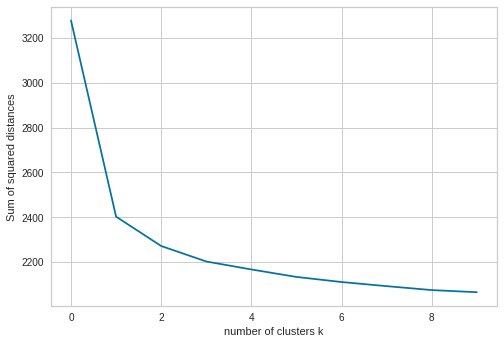

In [ ]:
plt.plot( sse, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.show()

In [ ]:
kmeans_1 = KMeans(n_clusters=3,random_state= 10)# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_data)# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_data, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_data, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_data, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.1090
Calinski Harabasz Score: 179.1876
Davies Bouldin Score: 2.6219


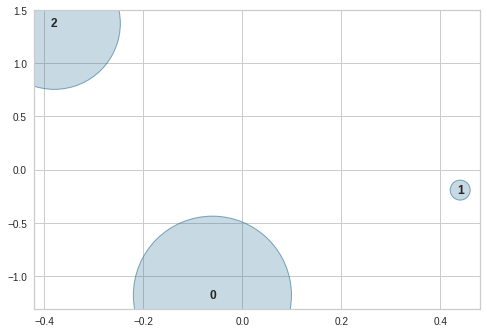

In [ ]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1,)
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer;       # Finalize and render the figure



In [79]:
cluster_data['distances'] = [np.min(x) for x in kmeans_1.fit_transform(cluster_data)]

In [83]:
cluster_data['cluster'] = predictions 
cluster_one = cluster_data[cluster_data['cluster']==0].drop('cluster',axis=1)
cluster_one.sort_values('distances',axis=0,ascending=False,inplace=True)
cluster_two = cluster_data[cluster_data['cluster']==1].drop('cluster',axis=1)
cluster_two.sort_values('distances',axis=0,ascending=False,inplace=True)
cluster_three = cluster_data[cluster_data['cluster']==2].drop('cluster',axis=1)
cluster_three.sort_values('distances',axis=0,ascending=False,inplace=True)



In [88]:
cluster_one[0:1]

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51,distances
Product_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P319,0.08,0.0,0.58,0.33,0.5,0.67,0.58,0.5,0.92,0.08,0.67,0.42,0.75,0.42,0.75,0.75,0.83,0.25,0.17,0.67,0.33,1.0,0.33,0.25,0.67,1.0,0.17,0.92,0.0,0.08,1.0,0.0,0.25,0.42,0.92,0.5,0.0,0.75,0.0,0.75,0.58,0.25,0.42,0.0,0.42,0.08,0.33,0.25,0.0,0.08,0.42,0.08,2.184976


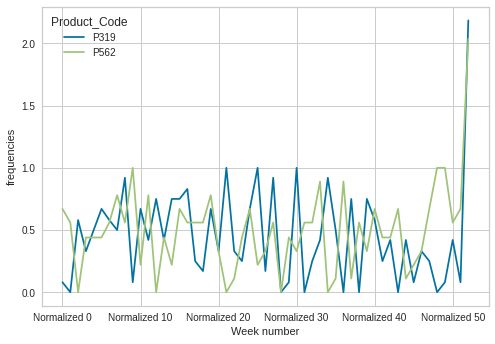

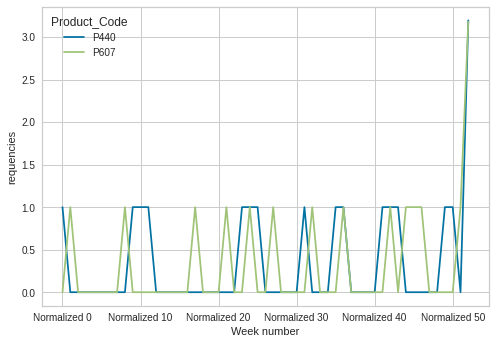

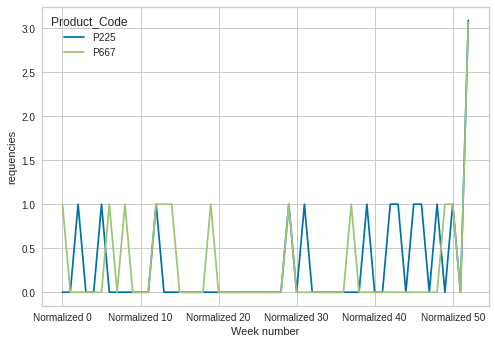

In [103]:
cluster_one[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('frequencies')
cluster_two[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('requencies')
cluster_three[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('requencies')
plt.show()

**Agglomerative** 

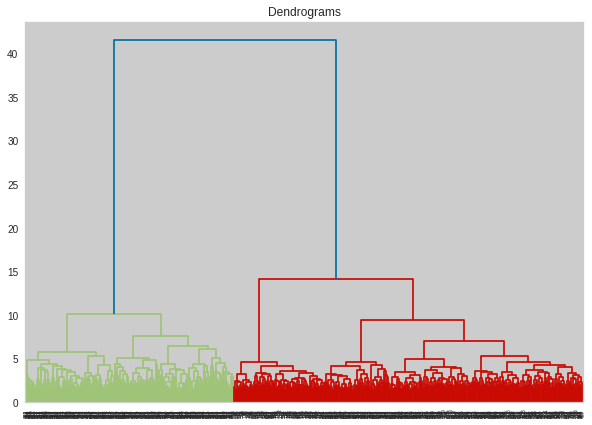

In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_data, method='ward'))

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(cluster_data)
yhat_2 = model.fit_predict(cluster_data)
# retrieve unique clusters
clusters = unique(yhat)# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(cluster_data, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(cluster_data, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(cluster_data, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1041
Calinski Harabasz Score: 168.7981
Davies Bouldin Score: 2.6177


**DBSCAN**

In [ ]:
pip install kneed

2.12


<Figure size 360x360 with 0 Axes>

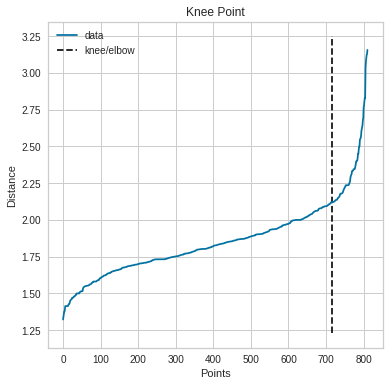

In [ ]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(cluster_data)
distances, indices = neighbors.kneighbors(cluster_data)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

Optimal number of min_samples based on DB score: [23, 24, 25, 26, 27, 28, 29]


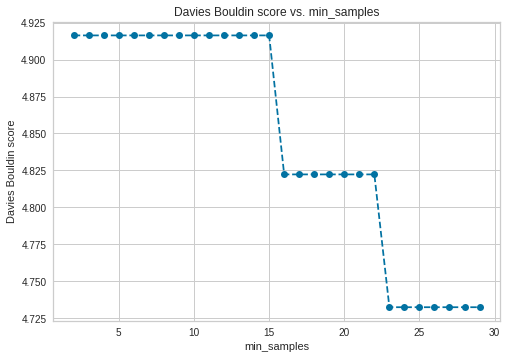

In [ ]:
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 2.12, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(cluster_data)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_data, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=2.12, min_samples= 23)
# fit model and predict clusters
yhat = model.fit_predict(cluster_data)
# retrieve unique clusters
clusters = unique(yhat)# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(cluster_data, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(cluster_data, yhat)
score_dbsacn_d = davies_bouldin_score(cluster_data, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)



Silhouette Score: 0.1715
Calinski Harabasz Score: 7.9397
Davies Bouldin Score: 4.7325


**paper  methodology**

In [107]:
paper_data = cluster_data.drop(['cluster','distances'],axis=1)
paper_data= paper_data.T

In [109]:
y = 5 
x = len(paper_data.index)
k = int(x/y)
print('instances in cluster: ',y,'\nLength of Time unites: ',x,'\nNumber of k: ',k)

instances in cluster:  5 
Length of Time unites:  52 
Number of k:  10


In [112]:
kmeans_1 = KMeans(n_clusters=k,random_state= 10)# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(paper_data)# Calculate cluster validation metrics
score_kemans_s = silhouette_score(paper_data, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(paper_data, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(paper_data, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.0235
Calinski Harabasz Score: 2.0295
Davies Bouldin Score: 1.7989


In [115]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(paper_data)
    sse.append(kmeans.inertia_)

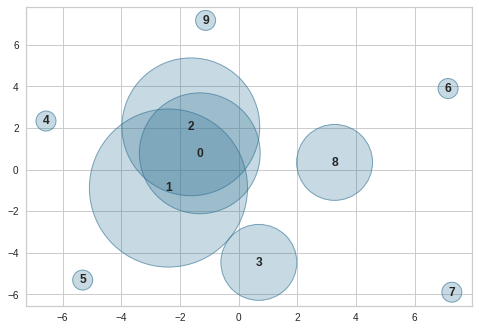

In [116]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1,)
visualizer.fit(paper_data)        # Fit the data to the visualizer
visualizer;       # Finalize and render the figure



In [117]:
paper_data['distances'] = [np.min(x) for x in kmeans_1.fit_transform(paper_data)]

In [118]:
paper_data['cluster'] = predictions 
cluster_one = paper_data[paper_data['cluster']==0].drop('cluster',axis=1)
cluster_one.sort_values('distances',axis=0,ascending=False,inplace=True)
cluster_two = paper_data[paper_data['cluster']==1].drop('cluster',axis=1)
cluster_two.sort_values('distances',axis=0,ascending=False,inplace=True)
cluster_three = paper_data[paper_data['cluster']==2].drop('cluster',axis=1)
cluster_three.sort_values('distances',axis=0,ascending=False,inplace=True)



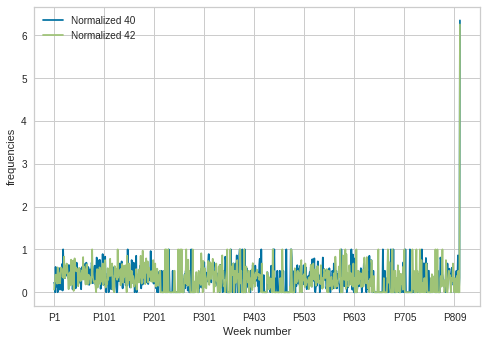

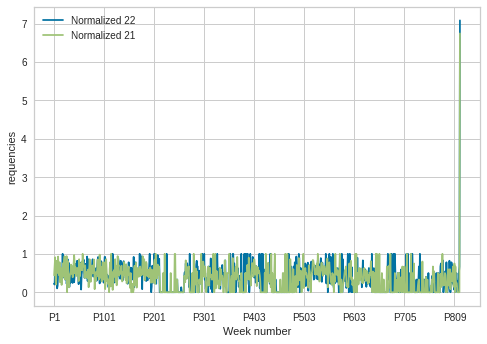

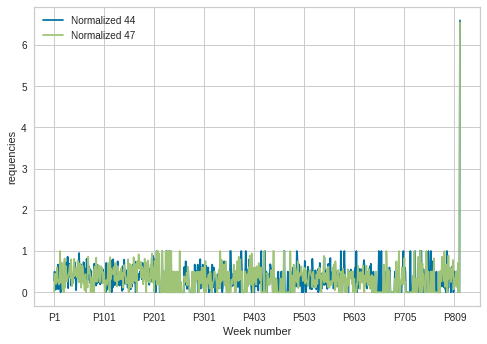

In [119]:
cluster_one[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('frequencies')
cluster_two[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('requencies')
cluster_three[0:2].T.plot()
plt.xlabel('Week number')
plt.ylabel('requencies')
plt.show()

In [120]:
kmeans_1 = KMeans(n_clusters=3,random_state= 10)# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(paper_data)# Calculate cluster validation metrics
score_kemans_s = silhouette_score(paper_data, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(paper_data, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(paper_data, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.0675
Calinski Harabasz Score: 6.8896
Davies Bouldin Score: 2.6508


In [126]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,}
# A list holds the SSE values for each k
sse = []
for k in range(1,50 ):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(paper_data)
    sse.append(kmeans.inertia_)

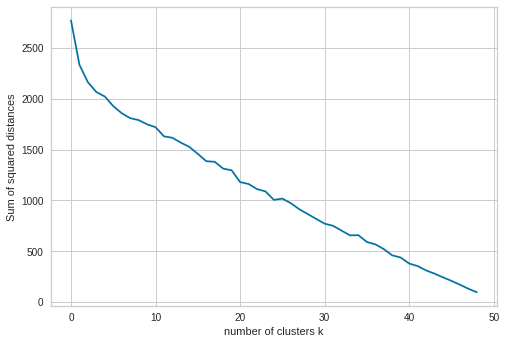

In [127]:
plt.plot( sse, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.show()

Optimal number of clusters based on DB score: [10]


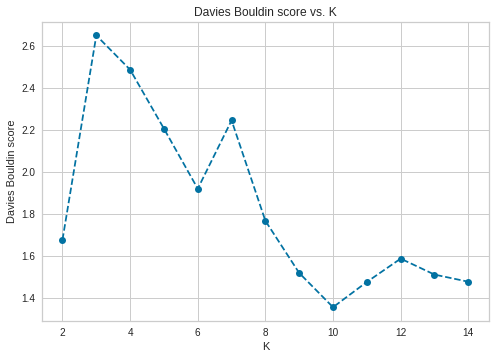

In [136]:
from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(paper_data)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(paper_data, model)
    
    return score

scores = []
centers = list(range(2,15))

for center in centers:
    scores.append(get_kmeans_score(paper_data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

**paper code with DSCAN**

9.301096950625821


<Figure size 360x360 with 0 Axes>

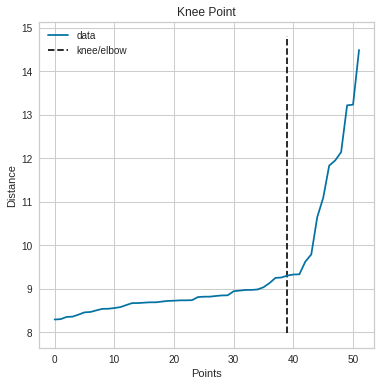

In [138]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(paper_data)
distances, indices = neighbors.kneighbors(paper_data)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

Optimal number of min_samples based on DB score: [23, 24]


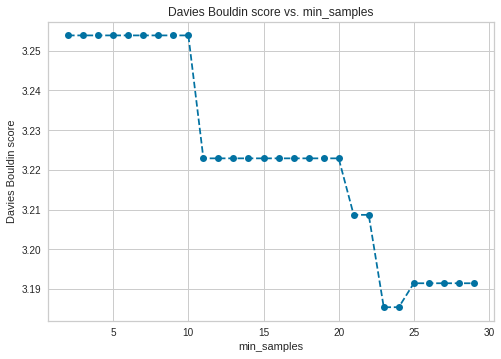

In [139]:
scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(paper_data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [144]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=9.301096950625821, min_samples= 23)
# fit model and predict clusters
yhat = model.fit_predict(paper_data)
# retrieve unique clusters
clusters = unique(yhat)# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(paper_data, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(paper_data, yhat)
score_dbsacn_d = davies_bouldin_score(paper_data, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2085
Calinski Harabasz Score: 7.8215
Davies Bouldin Score: 2.1397


**Aprior Algorithm**

In [160]:
paper_freq_data = normalized.T
aprior_results = apriori(paper_freq_data, min_support=0.10, use_colnames=True)
fpgrowth_results = fpgrowth(paper_freq_data, min_support=0.10, use_colnames=True)

aprior_rules = association_rules(aprior_results, metric="support")
fpgrowth_rules = association_rules(fpgrowth_results, metric="support", min_threshold=1)



In [154]:
aprior_results

,support,itemsets
0,0.224414,(Normalized 0)
1,0.225647,(Normalized 1)
2,0.241677,(Normalized 2)
3,0.270037,(Normalized 3)
4,0.278668,(Normalized 4)
...,...,...
376,0.180025,"(Normalized 25, Normalized 51)"
377,0.114673,"(Normalized 50, Normalized 49)"
378,0.123305,"(Normalized 51, Normalized 49)"
379,0.151665,"(Normalized 51, Normalized 50)"


In [153]:
aprior_rules.sort_values('support', axis=0, ascending=False, inplace=True)
aprior_rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [161]:
fpgrowth_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
